# SymPy

Up until this point, we have worked with "non-symbolic" Python features. For example, if we set $x = 1$ and then $y = x$, the apparent relationship between $x$ and $y$ disappears when we change $x$.

In [1]:
x = 1
y = x
x = 2
y == x

False

This is because we are working with values for $x$ and $y$, rather than the symbols $x$ and $y$ themselves - i.e. we are doing arithmetic rather than algebra. The module `SymPy` is Python's *Computer Algebra System* (CAS). You might have used other CASs like *Maple* or *Mathematica*; `SymPy` has the major advantage of being free and open source. It has less features than the commercial packages, but is steadily growing.

First we will import `sympy`, and use `init_printing` to get SymPy to output maths nicely using LaTeX - this is optional.

In [2]:
import sympy as sym
sym.init_printing()

## Creating symbols

To create "symbols" to manipulate, use `sym.symbols`. Note that it takes a `tuple` of strings.

In [3]:
x, y, z = sym.symbols(("x", "y", "z"))

It's worth noting that your variable names can be different from the names that `SymPy` stores for the symbols:

In [4]:
# This is a recipe for confusion - you better have a good reason to do it!
u, v = sym.symbols(("s", "t"))

# This is a more reasonable thing to do
x0 = sym.symbols(("x_0"))
x0

If you know that you are only interested in real values of the variables, use `real=True` when creating it. There are other assumptions you can put on symbols (like being positive) - see [here](https://docs.sympy.org/latest/guides/assumptions.html#assumptions) for a guide.

In [5]:
s = sym.symbols("s", real=True)

## Expressions and substitution

We can use symbols to create expressions, mostly using the same syntax as for regular Python variables:

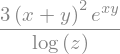

In [6]:
(3 * (x + y)**2 * sym.exp(x*y))/sym.log(z)

Note that we used the `SymPy` version of `exp` and `log`, rather than the `numpy` version. ***This is important - the numpy version simply will not work***. This is because `numpy.exp` expects a number (or an array of numbers), rather than a symbol. There are `SymPy` equivalents of most of the standard mathematical functions you would use in `numpy`.

Let's assign this expression to a variable:

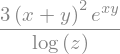

In [7]:
V = (3 * (x + y)**2 * sym.exp(x*y))/sym.log(z)

V

`V` looks like a function of three variables, but it is ***not a Python function***, which is why we cannot "call" it with three arguments:

In [8]:
V(0, 1, 2)

TypeError: 'Mul' object is not callable

Instead, we should "substitute" values for $x$, $y$, and $z$ like so:

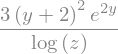

In [9]:
V.subs(x, 2)

Note that this has not changed `V` itself - it has simply returned a new expression where $x$ has been replaced with $2$.

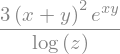

In [10]:
V

To substitute multiple values, pass a `list` of `(symbol, replacement)` pairs:

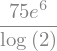

In [11]:
V.subs([(x, 2), (y, 3), (z, 2)])

We are not restricted to substituting in numbers. Suppose that we have a parameterisation $x = \sin(u)$, $y = \cos(u)$ for $u \in [0, 2\pi)$. We could make these substitutions like so:

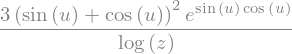

In [14]:
u = sym.symbols("u")

V.subs([(x, sym.sin(u)),(y, sym.cos(u))])

## Evaluation

Note that the expression above is still being stored as a symbolic expression rather than as a float, which helps to avoid rounding errors and the other perils associated with floats. If you really want a float, use `evalf`, providing it with a `dict` of `symbol : value` pairs.

In [ ]:
# The first argument to evalf controls how precise the output is.
# The default is 15 places.

V.evalf(30, subs={x: 2, y: 3, z: 2})

## Exact values

When creating expressions, we want to avoid floats when possible. In the following example, we try to create the exact expression $\frac{8}{3}x$ but instead get a rounded float coefficient. This is because the fraction $8/3$ is evaluated by Python before `SymPy` can get involved.

In [ ]:
8/3 * x

There are several ways of avoiding this: you can create the fraction as a `Rational` number:

In [ ]:
from sympy import Rational

u = Rational(8, 3) * x
u

Alternatively, you can "split up" your fraction like so:

In [ ]:
u = 8 * x / 3
u

The same is true of roots: instead of doing

In [ ]:
x ** (1/3)

You should do

In [ ]:
sym.root(x, 3)

## Manipulating expressions 

`SymPy` comes with the ability to simplify, factorise, and expand expressions. As an example, we will work with the cubic $p = (x-2)(x + 3)(x + 7)$

In [ ]:
P = (x - 2) * (x + 3) * (x + 7)
P

In [ ]:
Q = P.expand()
Q

To go the other way, use `factor`:

In [ ]:
Q.factor()

An interesting feature is that `P == Q` evaluates to `False`. This is because they are not "structurally" the same expression, even if they are the same "algebraic" expression.

In [ ]:
P == Q

The same is true of `P - Q == 0`:

In [ ]:
P - Q == 0

In order to check whether `P` and `Q` represent the same expression, the simplest thing to do is to `simplify` the expression `P - Q` and see whether it is $0$.

In [ ]:
(P - Q).simplify() == 0

Note that in general, it is not clear what is meant by a "simpler" expression, so `simplify` may return results you do not expect. It is also *theoretically impossible* for `simplify` to always work out whether an expression is equal to 0, though it will usually manage it for most reasonable expressions.

## Solving equations

### One variable

To find the roots of an expression, use `solveset`. For example, to find the roots of the polynomial $Q(x) = x^2 - x - 6$:

In [ ]:
Q = x**2 - x - 6

sym.solveset(Q)

If we don't want roots (i.e. solutions to $Q(x) = 0$) but instead solutions to $Q(x) = a$ for some $a \in \mathbb{R}$, simply find the roots of $Q - a$. For example, to get the solutions of $Q(x) = 1$ do:

In [ ]:
sym.solveset(Q - 1)

If we're only interested in the real solutions, we can use `domain=sym.Reals`:

In [ ]:
sym.solveset(Q + 7, domain = sym.Reals)

Note that `solveset` does not give us the multiplicity of roots:

In [ ]:
sym.solveset(x**2 + 2*x + 1)

For polynomials only, we can get the multiplicities using `roots`:

In [ ]:
sym.roots(x**2 + 2*x + 1)

You can also obtain the roots of an expression in terms of another variable:

In [ ]:
# solve x^2 + yx + 1 = 0 for x
sym.solveset(x**2 + y*x + 1, x)

To access these solutions, you can convert them to a list:

In [ ]:
sols = sym.solveset(x**2 + y*x + 1, x)

In [ ]:
sols = list(sols)
sols[0]

Alternatively, you can iterate through them directly:

In [ ]:
sols = sym.solveset(x**2 + y*x + 1, x)
for sol in sols:
    print(f"{sol} evaluated at y = 1: {sol.evalf(subs={y: 1})}")

### Solving systems of equations

Suppose we want to find stationary points of the following system of ODES

\begin{align} 
\frac{du}{dt} &= (u+1)v \\ 
    \frac{dv}{dt} &= v(u + 2v).
\end{align}
   
That is, we want to solve the system

\begin{align}
(u+1)v &= 0 \\ 
    v(u + 2v) &= 0.
\end{align}

First we create our symbols. We will use `real=True` to only get real solutions to our system.

In [ ]:
u, v = sym.symbols("u v", real=True)

Now our system is represented by the following expressions (which `SymPy` will assume we are trying to find roots of, as above)

In [ ]:
eqs = [(u + 1) * v, v*(u + 2*v)]

And we can solve like so:

In [ ]:
sols = sym.solve(eqs, [u, v])

sols

Note that unlike `solveset`, the output from `solve` is already in `list` form.

In [ ]:
sols[1][1]

## Differentiation

One of the nice features of `SymPy` is its ability to perform differentiation (both partial and total). Let's consider a moderately complicated function with a high likelihood of mistakes if we took derivatives by hand, $V(x) = (\tan^2(x) + 1)^3\sinh(x^3)$:

In [ ]:
V = (sym.tan(x) ** 2 + 1)**3 * sym.sinh(x**3)

To differentiate, use `sym.diff`, specifying which variable to differentiate with respect to (here there is of course only one option):

In [ ]:
# Differentiate V with respect to x
sym.diff(V, x)

To take higher derivatives, just add a number to the end:

In [ ]:
# d^2/dx^2 (V):
sym.diff(V, x, 2)

Alternatively, you can write out the variable you are differentiating with respect to repeatedly:

In [ ]:
sym.diff(V, x, x)

## Partial Derivatives

Now let's consider a function of three variables $x, y, z$:

In [ ]:
V = (3 * (x + y)**2 * sym.exp(x*y))/sym.log(z)

V

We can compute $\frac{\partial V}{\partial x}$ in precisely the same way as above:

In [ ]:
sym.diff(V, x)

The same would work for any of the other first partial derivatives; just replace `x` with the variable of interest.

If we instead wanted $\frac{\partial^2 V}{\partial z\partial x}$, we could obtain it like so:

In [ ]:
sym.diff(V, x, z)

In general, to compute $\frac{\partial^N V}{\partial x_1\partial x_2 \cdots \partial x_N}$, use `sym.diff(V, x_N, x_(N-1), ..., x_2, x_1)`. Remember that the order can matter (though very often does not for the functions we are interested in).

## Unevaluated derivative

It is possible to construct an object representing a derivative without actually computing it:

In [ ]:
D = sym.Derivative(V, x, y)
D

This might seem like an odd thing to do, but you might want to build up an expression involving a very messy derivative without having it expand and make it difficult to see what's going on. To evaluate such a derivative, use `doit`:

In [ ]:
D.doit()

You can also use `doit` on any expression in which `D` appears.

## Integration

CASs are very well suited to performing differentiation for us, as there's nothing particularly "clever" going on - the rules for differentiation are relatively straightforward and you could apply them by hand. Integration, on the other hand, can be very difficult. `SymPy` can integrate many functions that would be annoying to do manually. For example, the function $f(x) = x^{5} e^{2x} \sin(\frac{x}{3})$ can be integrated using repeated integration by parts, but it would be a little unpleasant. `SymPy` can compute it easily:

In [ ]:
f = x**3 * sym.exp(2*x) * sym.sin(x/3)
f

In [ ]:
sym.integrate(f, x)

### Definite integrals

To compute a definite integral, just provide `integrate` with the limits as well. For example, to compute $\int_{-3}^4 f(x) dx$ we would do

In [ ]:
# add the argument (x, -3, 4)
sym.integrate(f, x, (x, -3, 4))

To evaluate definite integrals with limits at infinity, use `sym.oo` (two o's). For example, to compute $\int_{-\infty}^0 f(x)dx$:

In [ ]:
sym.integrate(f, x, (x, -sym.oo, 0))

### Multiple integrals

Computing multiple integrals works just like computing multiple derivatives: just give the variables and limits in the order you want the integrals to be performed. As an example, here is how to compute $\int_{-\infty}^{0} \int_{-2\pi}^{y} x^2 e^y dx\, dy$:

In [ ]:
g = x ** 2 * sym.exp(y)

sym.integrate(g, (x, -2*sym.pi, y), (y, -sym.oo, 0))

### Unevaluated integrals

As with derivatives, you can leave an integral in an unevaluated form. This can be useful to check that you have entered the limits correctly and are integrating in the correct order.

In [ ]:
sym.Integral(g, (x, -2*sym.pi, y), (y, -sym.oo, 0))

To evaluate the integral, use `doit`:

In [ ]:
I = sym.Integral(g, (x, -2*sym.pi, y), (y, -sym.oo, 0))

I.doit()

## Special functions

Many integrals do not have nice solutions, i.e. cannot be expressed in closed-form in terms of standard functions. Some of these integrals have solutions in terms of *special functions* like the *error function* or the *gamma function*:

In [ ]:
sym.integrate(sym.exp(-x**2), x)

In [ ]:
sym.integrate(sym.exp(-x**3), (x, 0, 3))

Sometimes `SymPy` simply cannot perform the integration, in which case it just returns the integral:

In [ ]:
sym.integrate(sym.sin(x) * sym.exp(-x**2))

## Plotting

If we want to produce plots from expressions, it is convenient to convert the expression into a form that `numpy` can understand. To do this, use the `lambdify` function:

In [ ]:
import numpy as np

T = sym.cos(x) * (x**2 + y**2)

# First argument is the arguments of the new function (in order)
# Second argument is the expression to convert
# Third argument is the module to use (typically numpy)
U = sym.lambdify([x, y], T, "numpy")

Now the function can be plotted as usual:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

xp = np.arange(-5, 5, 0.01)
yp = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(xp, yp)
Z = U(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

ax.plot_surface(X, Y, Z, cmap="coolwarm");
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('T(x,y)',fontsize=14);

We might want to just look at a "slice" of that surface, say through the plane $y = 1$. We would do the same thing, but substitute in $y = 1$ first:

In [ ]:
T2 = T.subs(y, 1)
U2 = sym.lambdify(x, T2, "numpy")

In [ ]:
%matplotlib inline

X = np.arange(-5, 5, 0.01)
Z = U2(X)

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(xp, Z);
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('T(x, 1)',fontsize=14);